In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from utils import DimReductionEvaluation
import tensorflow as tf
# Set the path to the folder containing the image data
data_path = '../dataset/input_resized_256/flowers/'
IMG_SIZE=64
# Create an instance of the DimReductionEvaluation class
dre = DimReductionEvaluation()
dre.load_data(data_path, IMG_SIZE)

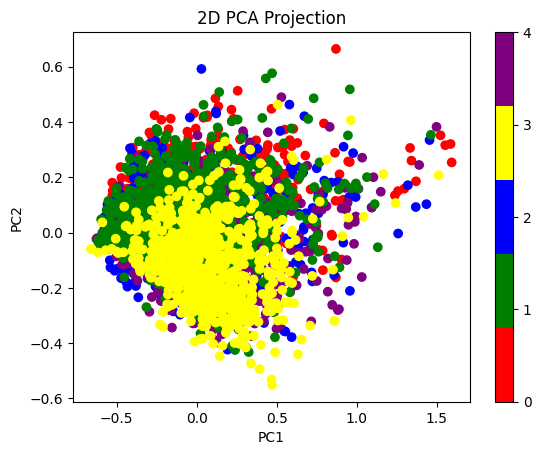

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from matplotlib.colors import ListedColormap

X_data=dre.X_flaten
Y_labels=dre.Y
# Convert string labels to numerical labels
label_map = {label: i for i, label in enumerate(np.unique(Y_labels))}
Y_labels = np.array([label_map[label] for label in Y_labels])

# Define a colormap to use for the labels
cmap = ListedColormap(['red', 'green', 'blue', 'yellow', 'purple'])

# Perform PCA on the data
pca = KernelPCA(n_components=2, kernel='poly')
X_pca = pca.fit_transform(X_data)

# Create a scatter plot of the 2D PCA projection, with different colors for each label
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=Y_labels, cmap=cmap)

# Add labels and a legend to the plot
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection')
plt.colorbar(ticks=np.arange(len(label_map)))
plt.show()


In [5]:

model_cnn=tf.keras.models.load_model('../models/CNN_model_1.h5')
dre_128=DimReductionEvaluation()
dre_128.load_data(data_path, image_size=128)
layer_name = model_cnn.layers[-2].name
intermediate_layer_model = tf.keras.models.Model(inputs=model_cnn.input,
                                  outputs=model_cnn.get_layer(layer_name).output)
intermediate_layer_model.summary()


Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46_input (InputLayer  [(None, 128, 128, 3)]    0         
 )                                                               
                                                                 
 conv2d_46 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                        

 11/135 [=>............................] - ETA: 0s 

2023-04-11 13:56:37.632175: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


135/135 [==============================] - 1s 4ms/step


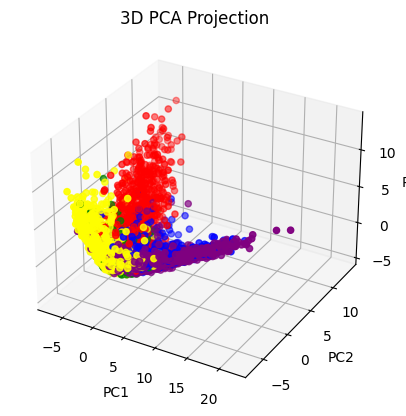

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from matplotlib.colors import ListedColormap

# Generate some example data

X_data=intermediate_layer_model.predict(dre_128.X)
Y_labels=dre.Y

# Convert string labels to numerical labels
label_map = {label: i for i, label in enumerate(np.unique(Y_labels))}
Y_labels = np.array([label_map[label] for label in Y_labels])

# Define a colormap to use for the labels
cmap = ListedColormap(['red', 'green', 'blue', 'yellow', 'purple'])

# Perform PCA on the data
pca = KernelPCA(n_components=3, kernel='linear')
X_pca = pca.fit_transform(X_data)

# Create a 3D scatter plot of the PCA projection, with different colors for each label
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=Y_labels, cmap=cmap)

# Add labels and a legend to the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Projection')
plt.show()


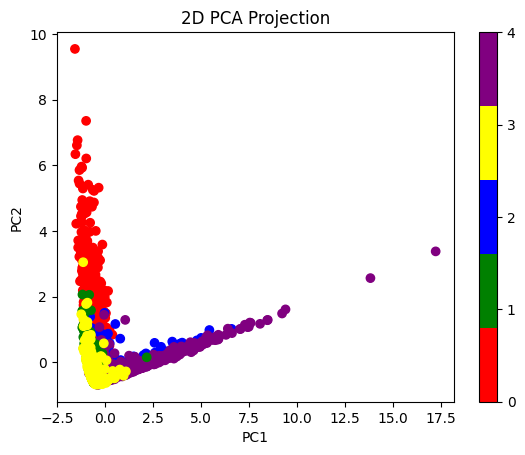

In [7]:
# Convert string labels to numerical labels
label_map = {label: i for i, label in enumerate(np.unique(Y_labels))}
Y_labels = np.array([label_map[label] for label in Y_labels])

# Define a colormap to use for the labels
cmap = ListedColormap(['red', 'green', 'blue', 'yellow', 'purple'])

# Perform PCA on the data
pca = KernelPCA(n_components=2, kernel='poly')
X_pca = pca.fit_transform(X_data)

# Create a scatter plot of the 2D PCA projection, with different colors for each label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_labels, cmap=cmap)

# Add labels and a legend to the plot
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection')
plt.colorbar(ticks=np.arange(len(label_map)))
plt.show()
